# Cat And Dog classifications using Transfer learning .

Inception Model.


Weights link
https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 
  

In [1]:
#Import library
import os
from tensorflow.keras import layers,Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
#Path of weights

local_weights_file='inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model=InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable=False
    
pre_trained_model.summary()

last_layer=pre_trained_model.get_layer('mixed7')
print('last layer output shape',last_layer.output_shape)
last_output=last_layer.output



W0305 16:20:21.486353 140530809890624 deprecation.py:506] From /home/jo/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
from tensorflow.keras.optimizers import RMSprop

#Flatten the output layer to 1 dimension
# Flatten the output layer to 1 dimension
x=layers.Flatten()(last_output)
print(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x=layers.Dense(1024,activation='relu')(x)
#Add a dropout rate of 0.2
x=layers.Dropout(0.2)(x)                 
# Add a final sigmoid layer for classification
x=layers.Dense(1,activation='sigmoid')(x)

model=Model(pre_trained_model.input,x)
model.compile(optimizer=RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['acc'])


Tensor("flatten/Reshape:0", shape=(?, 37632), dtype=float32)


W0305 16:20:34.532136 140530809890624 deprecation.py:323] From /home/jo/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip_file="cats_and_dogs_filtered.zip"
zip_ref=zipfile.ZipFile(local_zip_file,'r')
zip_ref.extractall("")
zip_ref.close()

In [5]:
train_dir="cats_and_dogs_filtered/train"
validation_dir="cats_and_dogs_filtered/validation/"

print("Cat train images : ",len(os.listdir(train_dir+"/cats")))
print("Dog train images : ",len(os.listdir(train_dir+"/dogs")))
print("Cat  validation images : ",len(os.listdir(validation_dir+"/cats")))
print("Dog validation images : ",len(os.listdir(validation_dir+"/dogs")))

Cat train images :  1000
Dog train images :  1000
Cat  validation images :  500
Dog validation images :  500


In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                    shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(150,150))
validation_generator=validation_datagen.flow_from_directory(validation_dir,batch_size=10,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history=model.fit_generator(
            train_generator,
            validation_data=validation_generator,
            epochs=10,
            steps_per_epoch=100,
            validation_steps=50,
            verbose=2)

Epoch 1/10
100/100 - 115s - loss: 0.4768 - acc: 0.7725 - val_loss: 0.1831 - val_acc: 0.9440
Epoch 2/10
100/100 - 119s - loss: 0.3821 - acc: 0.8280 - val_loss: 0.4005 - val_acc: 0.9020
Epoch 3/10
100/100 - 112s - loss: 0.3467 - acc: 0.8600 - val_loss: 0.1645 - val_acc: 0.9580
Epoch 4/10
100/100 - 110s - loss: 0.3299 - acc: 0.8635 - val_loss: 0.2718 - val_acc: 0.9360
Epoch 5/10
100/100 - 120s - loss: 0.3149 - acc: 0.8655 - val_loss: 0.3563 - val_acc: 0.9360
Epoch 6/10
100/100 - 111s - loss: 0.3161 - acc: 0.8610 - val_loss: 0.2927 - val_acc: 0.9480
Epoch 7/10
100/100 - 108s - loss: 0.3124 - acc: 0.8650 - val_loss: 0.1952 - val_acc: 0.9660
Epoch 8/10
100/100 - 111s - loss: 0.2999 - acc: 0.8890 - val_loss: 0.2413 - val_acc: 0.9680
Epoch 9/10
100/100 - 115s - loss: 0.2951 - acc: 0.8710 - val_loss: 0.6086 - val_acc: 0.9320
Epoch 10/10
100/100 - 112s - loss: 0.2630 - acc: 0.8920 - val_loss: 0.3162 - val_acc: 0.9600


<Figure size 432x288 with 0 Axes>

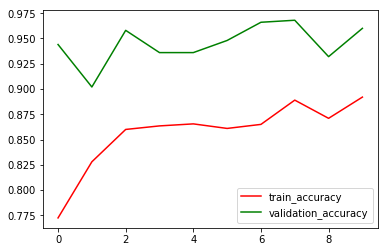

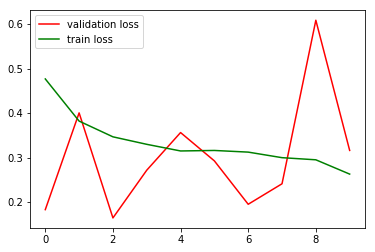

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
train_accuracy=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(len(train_accuracy))

plt.plot(epochs,train_accuracy,'r',label='train_accuracy')
plt.plot(epochs,val_acc,'g',label='validation_accuracy')
plt.legend()
plt.figure()


val_loss=history.history['val_loss']
loss=history.history['loss']
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.plot(epochs,loss,'g',label='train loss')
plt.legend()
plt.figure()